# Paper Reproduction

This notebook includes the code required to replicate the first experiment of my master's thesis. We utilized Python to reproduce the Oncothromb paper and introduced a novel approach for computing the p-values through permutation testing.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score

In [52]:
df_alleles = pd.read_csv('oncoth1_with_n_risk_alleles.csv')

In [53]:
df = pd.read_csv('development_db_score_oncothromb.csv')

In [54]:
df_alleles['VTE'] = df['VTE'].values

## Development of the genetic risk score (GRS)

### Compute p-values using statsmodel

In [55]:
import pandas as pd
import statsmodels.api as sm

def compute_model_stats(df):
    """
    Computes model statistics for genetic features in a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame containing genetic features.

    Returns:
        dict: A dictionary containing the p-values of logistic regression models for each genetic feature.
    """
    # Obtain the genetic features rs*
    df_gen = pd.concat([df['VTE'], df.iloc[:, 21:]], axis=1)
    cols_names_gen = df_gen.columns[1:]
    model_stats_pvalues = {}

    for element in cols_names_gen:
        # Drop NaN rows.
        df_pred = df_gen[['VTE', element]].dropna()
        # Get one hot encoding
        X = pd.get_dummies(df_pred[element]).values
        y = df_pred['VTE'].values
        # Fit the logistic regression model
        logit_model = sm.Logit(y, X).fit()
        # Store the p-value of the model in the dictionary
        model_stats_pvalues[element] = logit_model.llr_pvalue

    return model_stats_pvalues

In [56]:
model_stats_pvalues = compute_model_stats(df)

Optimization terminated successfully.
         Current function value: 0.481683
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.505025
         Iterations 6
         Current function value: 0.482687
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.482399
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.482802
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.478712
         Iterations 5
         Current function value: 0.482983
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.480679
         Iterations 5
         Current function value: 0.481041
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.482107
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.481134
        

C:\Users\SergiBech\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SergiBech\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SergiBech\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SergiBech\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.474972
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469187
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.472833
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.475480
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.469495
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.473652
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.475916
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.476166
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.477092
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.473951
 

C:\Users\SergiBech\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SergiBech\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.476035
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.466487
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.474887
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480559
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.475044
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.473669
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.476221
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.481489
         Iterations 6
         Current function value: 0.468639
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.473315
         Iterations 5
         Current

C:\Users\SergiBech\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SergiBech\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.475912
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.473779
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.477797
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.475975
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.474576
         Iterations 6
         Current function value: 0.458863
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.473963
         Iterations 28
Optimization terminated successfully.
         Current function value: 0.477771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.474633
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.475825
         Iterations 5
Optimization te

### Compute p-values using permutation test

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

def compute_p_values(df):
    """
    Computes p-values and selects genetic variables based on logistic regression and permutation test.

    Args:
        df (pandas.DataFrame): The input DataFrame containing genetic features and the target variable.

    Returns:
        tuple: A tuple containing two dictionaries: p-values of all variables and selected genetic variables.
    """
    p_values_gen = {}  # Store p-values of all variables
    selected_predictors_gen = {}  # Store selected genetic variables

    for element in cols_names_gen:  # Iterate each feature
        df_pred = df_gen[['VTE', element]].dropna()
        X = pd.get_dummies(df_pred[element])  # Get one hot encoding
        y = df_pred['VTE']

        # Train a logistic regression model
        model = LogisticRegression()
        model.fit(X, y)

        # Compute the AUC-ROC score for the observed data
        y_pred = model.predict_proba(X)[:, 1]
        auc_obs = roc_auc_score(y, y_pred)

        # Perform the permutation test
        n_permutations = 1000
        auc_permuted = np.empty(n_permutations)

        for i in range(n_permutations):
            y_permuted = np.random.permutation(y)
            # Re-fit with permuted labels
            model.fit(X, y_permuted)
            y_pred_permuted = model.predict_proba(X)[:, 1]
            auc_permuted[i] = roc_auc_score(y_permuted, y_pred_permuted)

        # Calculate the p-value
        p_value = np.sum(auc_permuted >= auc_obs) / n_permutations
        p_values_gen[element] = p_value

        if p_value <= 0.250:
            selected_predictors_gen[element] = p_value
        # Paper says to add this genetic feature
        elif element == 'rs6025':
            selected_predictors_gen[element] = p_value

        # Print the p-value
        # print('p-value of ' + element + ': ' + str(p_value))

    return p_values_gen, selected_predictors_gen

In [58]:
p_values_gen, selected_predictors_gen = compute_p_values(df)

### Plot a comparison between both methods

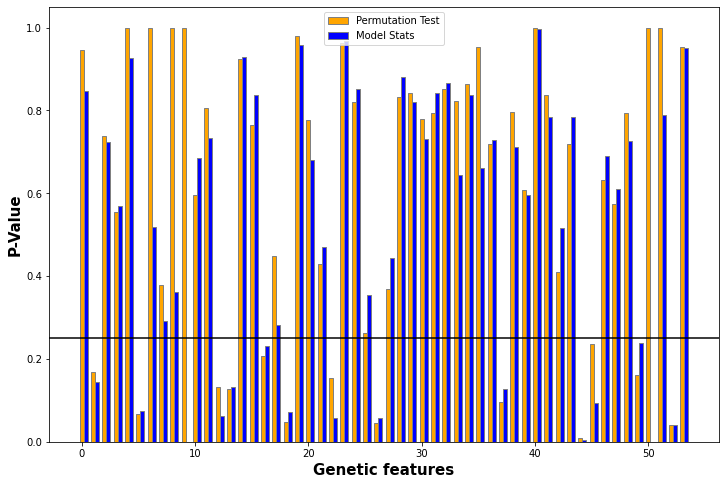

In [59]:
# set width of bar
barWidth = 0.35
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(p_values_gen))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, p_values_gen.values(), color ='orange', width = barWidth,
        edgecolor ='grey', label ='Permutation Test')
plt.bar(br2, model_stats_pvalues.values(), color ='blue', width = barWidth,
        edgecolor ='grey', label ='Model Stats')

# Adding Xticks
plt.xlabel('Genetic features', fontweight ='bold', fontsize = 15)
plt.ylabel('P-Value', fontweight ='bold', fontsize = 15)

plt.axhline(y = 0.250, color = 'black', linestyle = '-')
plt.legend()

plt.savefig('pvalues.png', dpi=300)

plt.show()

# Compute Genetic Risk Score

We compute the Genetic Risk Score with the selected features.
A straightforward method to evaluate the GRS is to choose a number k of independent genetic variants with strong (i.e., genome-wide significance in other studies or datasets) association as risk predictors, and to calculate the GRS as the sum of the effect estimates (log odds ratios), βi, from a logistic regression analysis with additive genetic effect, multiplied by the number of risk alleles, Ni, for each locus: 

In [60]:
# We remove rs8176719 because have many NULL elements
selected_predictors_gen.pop('rs8176719')
gen_predictors = list(selected_predictors_gen.keys())

In [61]:
#Select the risk alleles of the selected features
alleles_ = []
for element in gen_predictors:
    alleles_.append(element + '_n_risk_alleles')
alleles_.append('VTE')
alleles_.append('id')
df_alleles = df_alleles[alleles_].dropna()

### Compute GRS

In [62]:
from sklearn.linear_model import LogisticRegression

y = df_alleles['VTE']
X = df_alleles.drop(columns=['VTE', 'id'])

model = LogisticRegression(fit_intercept = True)
model.fit(X, y)

GRS = (model.coef_ * X).sum(axis=1) + model.intercept_
df_alleles['GRS'] = GRS

(array([ 1.,  4., 40., 53., 92., 87., 40., 23., 11.,  5.]),
 array([-3.59490463, -3.1902164 , -2.78552817, -2.38083994, -1.97615171,
        -1.57146348, -1.16677525, -0.76208703, -0.3573988 ,  0.04728943,
         0.45197766]),
 <BarContainer object of 10 artists>)

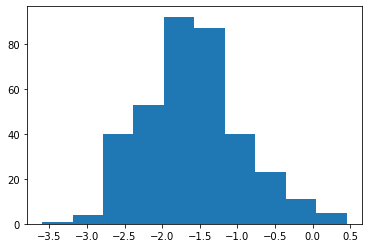

In [63]:
plt.hist(df_alleles['GRS'])

## Clinical Variables

- very high risk -> stomach, pancreas
- high risk -> lung, lymphoma, gynelocoligal, blader, testicular
- low risk -> colorectal
- platelet count >= 350x10^9/L -> high risk
- leukocyte count >= 11x10^9/L -> high risk

In [64]:
import re

def map_column(row, clinical_dict):
    """
    Maps a given row to a clinical category based on a dictionary of patterns.

    Args:
        row (any): The input row to be mapped.
        clinical_dict (dict): A dictionary containing patterns as keys and clinical categories as values.

    Returns:
        str: The mapped clinical category if a match is found, otherwise 'No Clasificado'.
    """
    # Convert row to string
    row = str(row)

    # Iterate over key-value pairs in clinical_dict
    for key, value in clinical_dict.items():
        # Use re.match to check if the pattern in value[0] matches row
        if re.match(value[0], row):
            # Return the key if a match is found
            return key
    
    # Return 'No Clasificado' if no match is found
    return 'No Clasificado'

In [65]:
def preprocess_clinical_features(df):
    """
    Preprocesses the clinical features of a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame containing clinical features.

    Returns:
        pandas.DataFrame: The preprocessed DataFrame with modified clinical features.
    """
    # Select the relevant columns from the DataFrame
    df_clin = df.iloc[:, 1:21]

    # Get the column names of the selected columns
    cols_names_clin = df_clin.columns[1:]

    # Map 'primary_tumor_simplified' values to numeric categories
    df_clin.loc[df_clin['primary_tumor_simplified'] == 'Colorectal', 'primary_tumor_simplified'] = 0
    df_clin.loc[df_clin['primary_tumor_simplified'] == 'NSCLC', 'primary_tumor_simplified'] = 1
    df_clin.loc[df_clin['primary_tumor_simplified'] == 'Oesophago-gastric', 'primary_tumor_simplified'] = 2
    df_clin.loc[df_clin['primary_tumor_simplified'] == 'Pancreatic', 'primary_tumor_simplified'] = 2

    # Map 'leukocytes' values to binary categories
    df_clin.loc[df_clin['leukocytes'] < 11000, 'leukocytes'] = 0
    df_clin.loc[df_clin['leukocytes'] >= 11000, 'leukocytes'] = 1

    # Map 'platelets' values to binary categories
    df_clin.loc[df_clin['platelets'] < 350000, 'platelets'] = 0
    df_clin.loc[df_clin['platelets'] >= 350000, 'platelets'] = 1

    # Define the BMI risk dictionary
    bmi_risk = {
        1: [r"(Obese: BMI > 30 kg/m2)|( Overweight: BMI ~25-29.9 Kg/m2)"],
        0: [r"(Normal: BMI ~ 18.5-24.9 Kg/m2)|(Underweight: BMI < 18.5 Kg/m2)"],
    }

    # Define the TNM stage detailed risk dictionary
    tnm_stage_detailed_risk = {
        1: [r"(IA)|(IB)"],
        2: [r"(IIB)|(IIA)|(IIC)"],
        3: [r"(III)|(IIIB)|(IIIA)|(IIIC)"],
        4: [r"(IVB)|(IVA)|(IV)"],
    }

    # Apply the map_column function to 'bmi_category' and 'tnm_stage_detailed' columns
    df_clin['bmi_category'] = df_clin['bmi_category'].apply(lambda x: map_column(x, bmi_risk))
    df_clin['tnm_stage_detailed'] = df_clin['tnm_stage_detailed'].apply(lambda x: map_column(x, tnm_stage_detailed_risk))

    return df_clin

In [66]:
df_clin = preprocess_clinical_features(df)

### Compute selection of clinical variables following the paper

In [67]:
# Drop the ones are not mentioned in the paper
df_clin = df_clin.drop(['pregnancy', 'oral_contraceptives', 'hemoglobin','n_appointment_patient_became_case'], axis=1)
df_clin['id'] = df['id'].values

Multivariate logistic regression

In [68]:
df_clin_selection = df_clin.dropna()

y = df_clin_selection['VTE']
X = df_clin_selection.drop(['VTE', 'id'], axis=1)
X = pd.get_dummies(X, columns = ['tobacco_use', 'gender']).astype(float)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.433244
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    VTE   No. Observations:                  311
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                           16
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                 0.09947
Time:                        16:19:54   Log-Likelihood:                -134.74
converged:                       True   LL-Null:                       -149.62
Covariance Type:            nonrobust   LLR p-value:                   0.01925
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
khorana_risk_score              -0.1983      0.565     -0.351      0.726      -1.306       0.909
tnm_stage_detailed               0.6695      0.233      2.875      0.004       0.213       1.126
primary_tumor_simplified         0.5707      0.583      0.978      0.328      -0.572       1.714
age_when_cancer_dx               0.0058      0.017      0.348      0.728      -0.027       0.038
family_background_vte            0.8849      0.645      1.372      0.170      -0.379       2.149
bmi_category                     0.2049      0.330      0.622      0.534      -0.441       0.851
diabetes_mellitus               -0.4796      0.403     -1.191      0.234      -1.269       0.310
dyslipidemia                     0.4012      0.321      1.250      0.211      -0.228       1.030
leukocytes                       0.2116      0.728      0.291      0.771      -1.216       1.639
platelets                       -0.3316      0.708     -0.468      0.640      -1.719       1.056
arterial_hypertension            0.0353      0.327      0.108      0.914      -0.607       0.677
previous_onco_surgery           -0.2524      0.387     -0.653      0.514      -1.010       0.506
immobilisation                   0.0514      0.350      0.147      0.883      -0.635       0.738
tobacco_use_Active smoker       -1.5870   9.63e+06  -1.65e-07      1.000   -1.89e+07    1.89e+07
tobacco_use_Former smoker       -2.0325   9.63e+06  -2.11e-07      1.000   -1.89e+07    1.89e+07
tobacco_use_Never has smoked    -1.7491   9.63e+06  -1.82e-07      1.000   -1.89e+07    1.89e+07
gender_Female                   -2.5314   9.63e+06  -2.63e-07      1.000   -1.89e+07    1.89e+07
gender_Male                     -2.8372   9.63e+06  -2.95e-07      1.000   -1.89e+07    1.89e+07
================================================================================================
"""

In [69]:
pvals = result.pvalues
pvals = pvals[pvals < 0.25]
print(pvals)

tnm_stage_detailed       0.004035
family_background_vte    0.170028
diabetes_mellitus        0.233771
dyslipidemia             0.211222
dtype: float64


In [70]:
clin_predictors = ['tnm_stage_detailed', 'family_background_vte', 'diabetes_mellitus', 'dyslipidemia', 'id', 'VTE']

### Backwards analysis

In [71]:
import numpy as np

def aic(model, X, y):
    """
    Calculates the Akaike Information Criterion (AIC) for a logistic regression model.

    Args:
        model: The trained logistic regression model.
        X: The input features.
        y: The target variable.

    Returns:
        float: The AIC value.
    """
    k = model.coef_.size
    # calculate the predicted probabilities for each data point
    pred_probs = model.predict_proba(X)
    # calculate the log likelihood value
    loglik = np.sum(y * np.log(pred_probs[:, 1]) + (1 - y) * np.log(1 - pred_probs[:, 1]))
    # calculate the AIC value
    aic_value = 2 * k - 2 * loglik
    return aic_value

In [72]:
df_GRS = df_alleles[['id','GRS']].reset_index(drop=True)
pvals['GRS'] = 0.0001

In [73]:
#Merge the GRS and the clinical features using the patient id
clinical_features = df_clin[clin_predictors].dropna()
df_ft = df_GRS.merge(clinical_features, on='id')

In [74]:
from sklearn.linear_model import LogisticRegression
import numpy as np

def backward_selection_aic(df):
    """
    Performs backward selection based on AIC (Akaike Information Criterion) for logistic regression.

    Args:
        df (pandas.DataFrame): The input DataFrame containing predictor variables and the outcome variable.

    Returns:
        dict: A dictionary containing AIC values for different subsets of predictor variables.
    """
    aic_list = {}  # Store AIC values for different subsets of predictor variables

    # Define the predictor variables and the outcome variable
    y = df['VTE']
    X = df.drop(columns=['VTE', 'id'])

    model = LogisticRegression()
    model.fit(X, y)

    predictors = list(X.columns)
    X_temp = X.copy()

    full_aic = model.score(X, y) - 2 * len(predictors)
    aic_list['all'] = full_aic

    while len(predictors) != 1:
        # Remove predictor with the highest p-value
        max_value = max(pvals.items(), key=lambda x: x[1])
        pvals.pop(max_value[0])
        print(max_value)
        predictors.remove(max_value[0])
        X_temp = X[predictors]
        model = LogisticRegression()
        model.fit(X_temp, y)
        aic_list[max_value[0]] = model.score(X_temp, y) - 2 * len(predictors)

    return aic_list

In [75]:
aic_list = backward_selection_aic(df_ft)

('diabetes_mellitus', 0.23377052218837846)
('dyslipidemia', 0.21122169959144477)
('family_background_vte', 0.17002762271433913)
('tnm_stage_detailed', 0.00403475202445113)


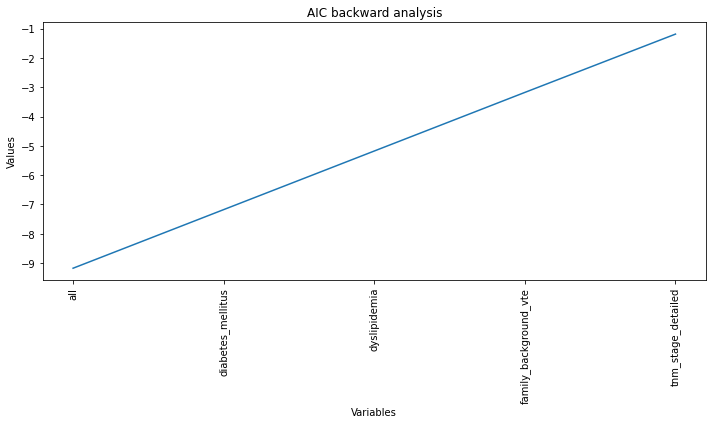

In [76]:
# Get the x and y values from the dictionary
x = list(aic_list.keys())
y = list(aic_list.values())

# Create a figure with a larger size
plt.figure(figsize=(10, 6))

# Plot the line
plt.plot(x, y)

# Add labels and title to the plot
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("AIC backward analysis")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Adjust the layout parameters to avoid cutting off the labels
plt.tight_layout()

# Save the plot
plt.savefig('elbow_curve.png', dpi=200)

# Show the plot
plt.show()


# Final model

### Model no duplicates

In [77]:
df_ft_no_dupes = df_ft.drop(columns = ['id', 'diabetes_mellitus', 'dyslipidemia']).drop_duplicates()

In [78]:
# define the predictor variables and the outcome variable
y = df_ft_no_dupes['VTE']
X = df_ft_no_dupes.drop(columns=['VTE'])

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Compute the AUC-ROC score for the observed data
y_pred = model.predict_proba(X)[:,1]
auc = roc_auc_score(y, y_pred)
print("Final score:", auc)

Final score: 0.7547682709447415


### Model duplicates

In [79]:
# define the predictor variables and the outcome variable
y_dupes = df_ft['VTE']
X_dupes = df_ft.drop(columns=['VTE', 'id', 'diabetes_mellitus', 'dyslipidemia'])

# Train a logistic regression model
model_dupes = LogisticRegression()
model_dupes.fit(X_dupes, y_dupes)

# Compute the AUC-ROC score for the observed data
y_pred = model_dupes.predict_proba(X_dupes)[:,1]
auc = roc_auc_score(y_dupes, y_pred)
print("Final score:", auc)

Final score: 0.766189638631276


In [80]:
roc_curve_onco = pd.read_csv('no_dups_roc_curve_oncothromb_score_replicated.csv')
pr_curve_onco = pd.read_csv('no_dups_pr_curve_oncothromb_score_replicated.csv')
roc_curve_orig = pd.read_csv('mean_roc_curve_from_cv_oncothromb.csv')
prc_curve_orig = pd.read_csv('pr_curve_oncothromb_score_replicated.csv')

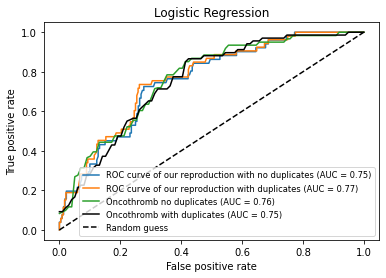

In [81]:
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y,model.predict_proba(X)[:,1])
fpr_2, tpr_2, thresholds = roc_curve(y_dupes,model_dupes.predict_proba(X_dupes)[:,1])


# Calculate the AUC value
auc_value = auc(fpr, tpr)
auc_value_2 = auc(fpr_2, tpr_2)

auc_value_3 = auc(roc_curve_onco['fpr_points'], roc_curve_onco['mean_tpr'])
auc_value_4 = auc(roc_curve_orig['fpr_points'], roc_curve_orig['mean_tpr'])

# Plot the ROC curve and add the AUC value to the plot
plt.plot(fpr, tpr, label='ROC curve of our reproduction with no duplicates (AUC = %0.2f)' % auc_value)
plt.plot(fpr_2, tpr_2, label='ROC curve of our reproduction with duplicates (AUC = %0.2f)' % auc_value_2)

plt.plot(roc_curve_onco['fpr_points'], roc_curve_onco['mean_tpr'], label='Oncothromb no duplicates (AUC = %0.2f)' % auc_value_3)
plt.plot(roc_curve_orig['fpr_points'], roc_curve_orig['mean_tpr'],color='black', label='Oncothromb with duplicates (AUC = %0.2f)' % auc_value_4)

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.legend(loc='lower right', fontsize='small')
# Save figure with higher DPI
#plt.savefig('ROC_curve_reproduction.png', dpi=300)
plt.show()


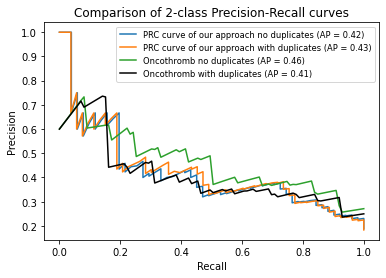

In [82]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get precision, recall, and threshold values for test data
precision, recall, threshold = precision_recall_curve(y, model.predict_proba(X)[:, 1])
precision_2, recall_2, threshold = precision_recall_curve(y_dupes, model.predict_proba(X_dupes)[:, 1])


# Create a new figure and axis object
fig, ax = plt.subplots()

ap = auc(pr_curve_onco.recall_points, pr_curve_onco.mean_precision)
ap_2 = auc(recall, precision)
ap_3 = auc(recall_2, precision_2)
ap_4 = auc(prc_curve_orig.recall, prc_curve_orig.precision)


# Plot the test data Precision-Recall curve
ax.plot(recall, precision, label='PRC curve of our approach no duplicates (AP = %0.2f)' % ap_2)
ax.plot(recall_2, precision_2, label='PRC curve of our approach with duplicates (AP = %0.2f)' % ap_3)

ax.plot(pr_curve_onco.recall_points, pr_curve_onco.mean_precision, label='Oncothromb no duplicates (AP = %0.2f)' % ap)
ax.plot(prc_curve_orig.recall, prc_curve_orig.precision,color='black', label='Oncothromb with duplicates (AP = %0.2f)' % ap_4)

# Set the x and y axis labels, title, and legend
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Comparison of 2-class Precision-Recall curves")
plt.legend(loc='best', fontsize='small')

# Save the figure and show it
# plt.savefig('PRC_curve_reproduction.png', dpi=300)
plt.show()
